<a href="https://colab.research.google.com/github/Rogerio-mack/Visualizacao-de-Dados-em-Python/blob/main/c3_parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evolução**
<hr>

Com o instrumental básico que vimos até aqui você pode começar a explorar diferentes visualizações de dados. Neste capítulo vamos estar interessados em observar a evolução de um conjunto de dados, o comportamento de uma ou mais variáveis *dependentes*, com relação a uma outra variável que chamaremos de *independente*.  

Vários conjuntos de dados de interesse apresentam essas características, como sa funções matemáticas em geral, séries temporais e séries históricas de dados. O número de internações diárias em um hospital, os hits diários em um site de e-commerce, o aumento da energia produzida com a intensidade da luz em uma placa de energia solar, as séries históricas de valores do PIB, ou a evolução das emissões de CO2 ao longo do tempo para citar somente alguns exemplos.  

Gráficos de linha, como os que empregamos até aqui, são comumente usados para observar essa evolução dos dados. Mas antes de prosseguirmos vamos entender a diferença entre gráficos de funções, que fizemos até aqui, e gráficos que exploram dados em geral.

## Funções, Equações e Dados

Nos exemplos do capítulo anterior empregamos empregamos na maior parte dos casos *funções* para aprender como produzir gráficos. As funções são um mapeamento de entradas e saídas em que, para cada dado de entrada (variáveis independentes) temos um único valor de saída (valor da variável dependente). Muitas funções são modeladas por Equações, como os modelos físicos de força ($F = m \alpha$) e cinemática empregados em física, e há diversos modelos em diferentes áreas como engenharia, economia, biologia ou mesmo nas ciências sociais, e modelos mais complexos podem evolver sistemas de várias equações.

## Modelo do Lançamento de um Projétil

Embora essas equações desempenhem um papel fundamental em muitos problemas, a análise de dados em geral emprega coleta de dados reais que, frequentemente, diferem dos modelos pela simplificação que muitas vezes adotam (desprezar o atrito por exemplo). Trabalhando com coletas, é comum os dados apresentarem mais de um valor para uma mesma entrada, como no caso de coleta de dados de vários experimentos ou de indivíduos diferentes. Neste caso, o mapeamento de entradas e saídas obtido não será uma função no sentido matemático do termo ( por definição, elas apresentam sempre um único valor para uma mesma entrada). Além disso, uma série de conjuntos de dados pode nem mesmo corresponder a qualquer função ou modelo de equações conhecido, bastando lembrar de conjuntos de dados de evolução de índices financeiros ou do aquecimento global.

O exemplo a seguir ilustra a diferença entre empregarmos equações para produzir visualizações, como fizemos até agora, e o emprego de dados obtidos por coleta.

Neste exemplo empregamos o modelo físico de lançamento de um projétil. A posição do projétil ao longo da sua trajetória pode ser dado em função de sua velocidade inicial e o ângulo de lançamento do projétil:

$$ x = V_{0} cos(\alpha) t $$
$$ y = V_{0} sin(\alpha) t - g t^2 / 2 $$

o primeiro gráfico  a seguir corresponde a essa trajetória teórica.

Se você já acompanhou algum experimento em um laboratório de física ou química, pode imaginar que uma coleta de dados de vários lançamentos de um projétil deve produzir resultados ligeiramente diferentes, seja por variáveis não consideradas no modelo como o atrito, velocidade do ar etc. seja por imprecisões na tomada das medidas. Simulamos essas coletas adicionando ruído ao modelo teórico para reproduzir os dados *reais* do experimento. Note que para a exibição desses dados (o segundo gráfico) empregamos a função `plt.scatter` e não o `plot` de linhas. O *scatter plot* é um gráfico de pontos. Ele não liga os pontos de dados por linhas e é útil para exibir como encontram-se dispersos os valores de duas variáveis. Voltaremos a ele no capítulo Relações.

$\rightarrow$ *`scatter` plot é um gráfico de pontos ou de dispersão dos dados. Ele não liga os pontos de dados por linhas e é útil para exibir como estão dispersos os valores dos dados de duas variáveis.*







In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

O código abaixo produz os dados da trajetória do projétil. Você pode pular se não estiver interessado nos detalhes de como produzimos esses dados.

In [2]:
# Cálculo da trajetória do projétil
def calc(iAngulo=45, iV0=100):
  angRAd = np.deg2rad(iAngulo)
  g = 9.8

  alcanceMax = round(((iV0**2) * np.sin(2*angRAd)) / g, 1)
  alturaMax = round((iV0**2) * (np.sin(angRAd))**2 / (2*g), 1)
  tempoTotal = round((((2*iV0) * np.sin(angRAd)) / g), 1)

  t = np.arange(0, tempoTotal, 0.25)

  x = abs(iV0) * np.cos(angRAd) * t
  y = (abs(iV0) * np.sin(angRAd) * t) - ((g*(t**2))/2)

  vx = abs(iV0) * np.cos(angRAd) * ( t*0 + 1 )
  vy = abs( abs(iV0) * np.sin(angRAd) * ( t*0 + 1 ) - g*t )
  return t,x,y,vx,vy

# Cálculo das trajetórias para lançamentos em ângulos de 45, 30 e 60 graus
t,x,y,vx,vy = calc(45)
A = np.ones(len(t))*45
M = np.ones(len(t))
df_teorico = pd.DataFrame(zip(M,A,t,x,y), columns=['medida','angulo','t','x','y'])

t,x,y,vx,vy = calc(30)
A = np.ones(len(x))*30
M = np.ones(len(t))
df_teorico = pd.concat([df_teorico, pd.DataFrame(zip(M,A,t,x,y), columns=['medida','angulo','t','x','y'])])

t,x,y,vx,vy = calc(60)
A = np.ones(len(x))*60
M = np.ones(len(t))
df_teorico = pd.concat([df_teorico, pd.DataFrame(zip(M,A,t,x,y), columns=['medida','angulo','t','x','y'])])

# Simulando medidas de 20 lançamentos adicionando ruído ao modelo teórico
df_real = pd.DataFrame()
for i in range(20):
  df_med = df_teorico.copy()
  df_med.medida = i
  df_med.x += df_med.x * np.random.normal(0,1,len(df_med))/65
  df_med.y += df_med.y * np.random.normal(0,1,len(df_med))/65
  df_real = pd.concat([df_real, df_med])


Dados do lançamento teórico e do lançamentos reais simulados:

In [3]:
df_teorico.head()

,medida,angulo,t,x,y
0,1.0,45.0,0.00,0.000000,0.000000
1,1.0,45.0,0.25,17.677670,17.371420
2,1.0,45.0,0.50,35.355339,34.130339
3,1.0,45.0,0.75,53.033009,50.276759
4,1.0,45.0,1.00,70.710678,65.810678


In [4]:
df_real.head()

,medida,angulo,t,x,y
0,0,45.0,0.00,0.000000,0.000000
1,0,45.0,0.25,17.935907,17.617193
2,0,45.0,0.50,34.421787,34.448526
3,0,45.0,0.75,51.785536,50.276829
4,0,45.0,1.00,70.751481,64.336117


Gráficos dos dados de lançamento.

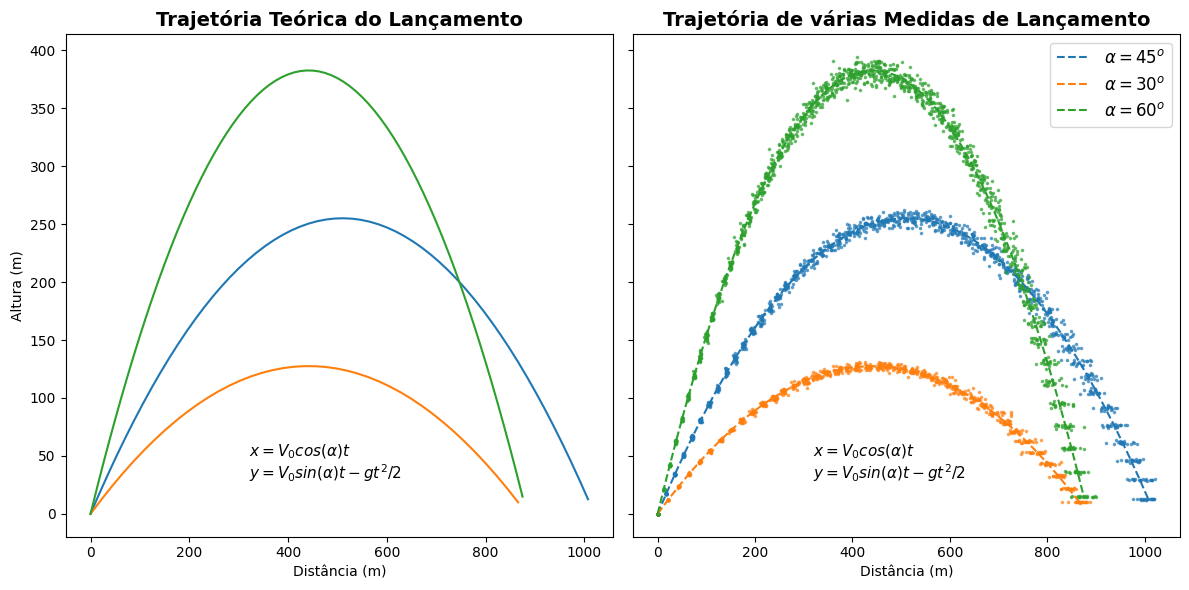

In [5]:
fig, ax = plt.subplots(1,2,figsize=(12,6),sharey=True)

# Gráficos
for ang in [45,30,60]:
  ax[0].plot(df_teorico[df_teorico.angulo == ang].x, df_teorico[df_teorico.angulo == ang].y, '-', label='$a_0 = $' + str(ang))

for ang in [45,30,60]:
  ax[1].scatter(df_real[df_real.angulo == ang].x, df_real[df_real.angulo == ang].y, s=2.5, alpha=0.6)
  ax[1].plot(df_teorico[df_teorico.angulo == ang].x, df_teorico[df_teorico.angulo == ang].y, '--', label='$\\alpha = $' + str(ang) + '$^o$')

# Anotações
for i in range(2):
  ax[i].text(320, 50, '$ x = V_{0} cos(\\alpha) t $', fontsize=11)
  ax[i].text(320, 30, '$ y = V_{0} sin(\\alpha) t - g t^2 / 2 $', fontsize=11)
  ax[i].set_xlabel("Distância (m)")

ax[0].set_title("Trajetória Teórica do Lançamento", fontsize=14, weight='bold')
ax[1].set_title("Trajetória de várias Medidas de Lançamento", fontsize=14, weight='bold')
ax[0].set_ylabel("Altura (m)")

plt.legend(fontsize=12)

plt.tight_layout()
plt.show()



Você pode notar que o último gráfico não corresponde exatamente a uma função. Em especial, no caso das várias medidas, encontramos diferentes valores de saída para os mesmos instantes de tempo. Não encontramos também a monotonicidade (dados crescentes ou descrecentes em um intervalo) ou a continuidade que normalmente exibem as funções, já que os pontos consideram um conjunto discreto e não um conjunto contínuo de dados.


**(*)** <small>A rigor aqui $x$ e $y$ são função do tempo $t$, isto é $x=x(t), y=y(t)$. Entretanto, exibimos um gráfico de $x \times y$ pois parece ser muito mais interessante exibir a trajetória dos lançamentos. A tabela da *função* pode ser vista `df_teorico.head()`.</small>

## Modelo de uma Turbina Eólica

Você talvez considere o modelo anterior muito elementar e imagine que casos como esse não encontrem paralelo de casos mais práticos. Vamos então explorar um exemplo real envolvendo dados de várias turbinas eólicas e os modelos teóricos do fabricante.

A seguir você encontra os dados do modelo teórico da energia produzida por uma turbina eólica em função da velocidade do vento e os dados reais coletados de a partir de medições. Aqui o modelo teórico é muito mais complexo do que o modelo anterior com várias equações que envolvem parâmetros da turbina, condições de funcionamento, diâmetro da hélice, direção do vento etc. e vamos empregar os valores já fornecidos pelo fabricante. Já os dados reais são medidas diretas de turbinas em operação.



In [6]:
data_T_AA = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/T1_reshape.csv')
data_T_AA_mean = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/T1_reshape_mean.csv')

data_T_AA.head()

,WindSpeed(m/s),ActivePower(kW),Theoretical_Power_Curve (KWh),Loss_Value(kW),Loss(%),count,direction
0,3.5,43.46,70.58,27.12,38.02,29,N
1,4.0,88.01,127.57,39.56,31.60,101,N
2,4.5,160.51,217.01,56.50,26.42,102,N
3,5.0,274.71,335.67,60.96,18.44,99,N
4,5.5,388.60,465.84,77.24,16.79,119,N


In [7]:
data_T_AA_mean.head()

,WindSpeed(m/s),ActivePower(kW),Theoretical_Power_Curve (KWh),Loss_Value(kW),Loss(%),count
0,3.5,52.191667,68.939167,16.745833,23.584167,56.250000
1,4.0,97.756667,127.686667,29.929167,23.646667,144.666667
2,4.5,183.601667,221.930000,38.327500,17.488333,149.500000
3,5.0,286.590833,336.426667,49.835000,14.937500,143.750000
4,5.5,400.392500,470.090833,69.699167,14.838333,167.666667


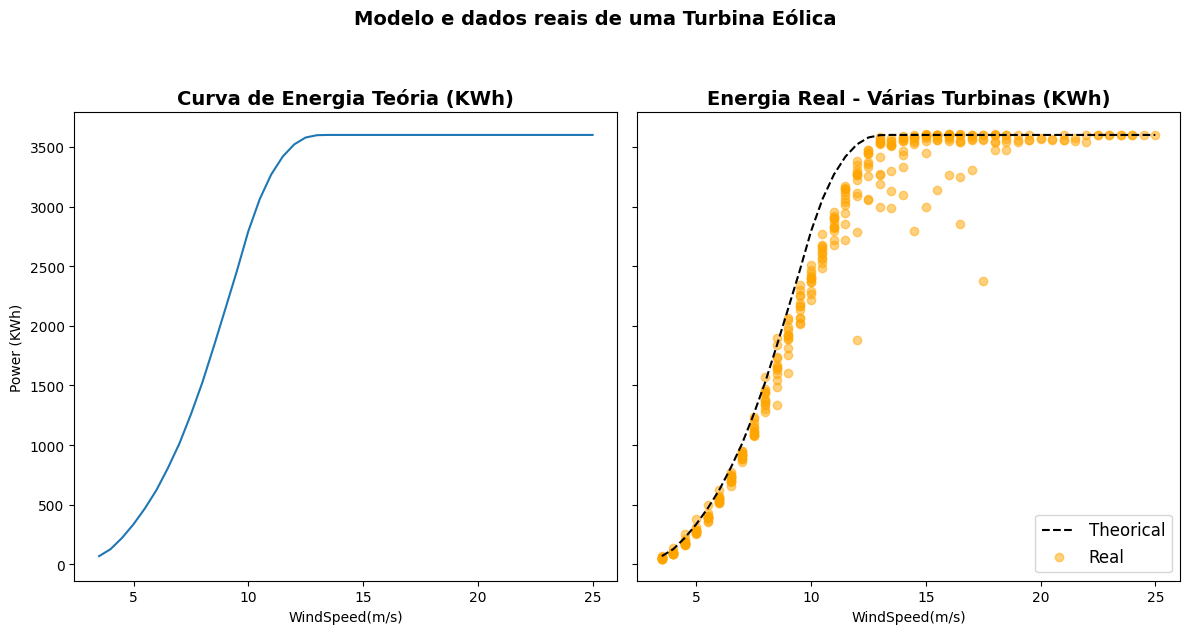

In [8]:
fig, ax = plt.subplots(1,2,figsize=(12,6),sharey=True)

fig.suptitle('Modelo e dados reais de uma Turbina Eólica', fontsize=14, weight='bold', y=1.05)

# Gráficos
ax[0].plot(data_T_AA_mean["WindSpeed(m/s)"],data_T_AA_mean["Theoretical_Power_Curve (KWh)"])

ax[1].plot(data_T_AA_mean["WindSpeed(m/s)"],data_T_AA_mean["Theoretical_Power_Curve (KWh)"], '--k', label='Theorical')
ax[1].scatter(data_T_AA["WindSpeed(m/s)"],data_T_AA["ActivePower(kW)"], label='Real', marker='o', color='orange', alpha=0.5)

ax[0].set_title("Curva de Energia Teória (KWh)", fontsize=14, weight='bold')
ax[1].set_title("Energia Real - Várias Turbinas (KWh)", fontsize=14, weight='bold')
ax[0].set_ylabel("Power (KWh)")

# Anotações
ax[0].set_xlabel("WindSpeed(m/s)")
ax[1].set_xlabel("WindSpeed(m/s)")

plt.legend(loc='lower right',fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.tight_layout()
plt.show()

O modelo teórico é útil e permite compararmos os dados reais o resultado modelo como abaixo. Podemos, por exemplo, observar os resultados abaixo do modelo teórico do fabricante para a faixa de velocidade do vento entre 9-12 m/s e a também a dipersão dos valores das diferentes turbinas. Novamente, nos dados reais, há mais de um valor de energia para cada entrada de velocidade do vento e não temos, portanto, uma *função* no sentido matemático do têrmo. A visualização fornece aqui um instrumento útil de análise dos dados e de comparação com relação ao modelo teórico.

## Covid, Bolsa e Google Trends

Mas há ainda uma classe de dados em que visualização parece desempenhar um papel ainda mais importante. Diferentemente do exemplo anterior, muitos conjuntos de dados não apresentam qualquer modelo teórico conhecido e torna a visualização dos dados essencial para a análise e a busca por padrões nos dados.

Os três exemplos que seguem mostram respectivamente, para um mesmo perído de 2020,  *(a)* a evolução de novos casos de Covid no Brasil, *(b)* valores de índices do Ibovespa e *(c)* frequencias da pesquisa de termos no Google (Google Trends). Para nenhum desses dados existe um modelo teórico bem conhecido, mas podemos, a partir da visualização dos dados, observar suas evoluções e analisar hipóteses de possíveis causas para os comportamentos observados.

### (a) Covid 2020

In [9]:
from datetime import datetime
corona_Brasil = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/corona_Brasil.csv')
corona_Brasil.data = pd.to_datetime(corona_Brasil.data, format='%Y-%m-%d',errors='coerce')

corona_Brasil.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9.0,210147125.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9.0,210147125.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9.0,210147125.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9.0,210147125.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9.0,210147125.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN


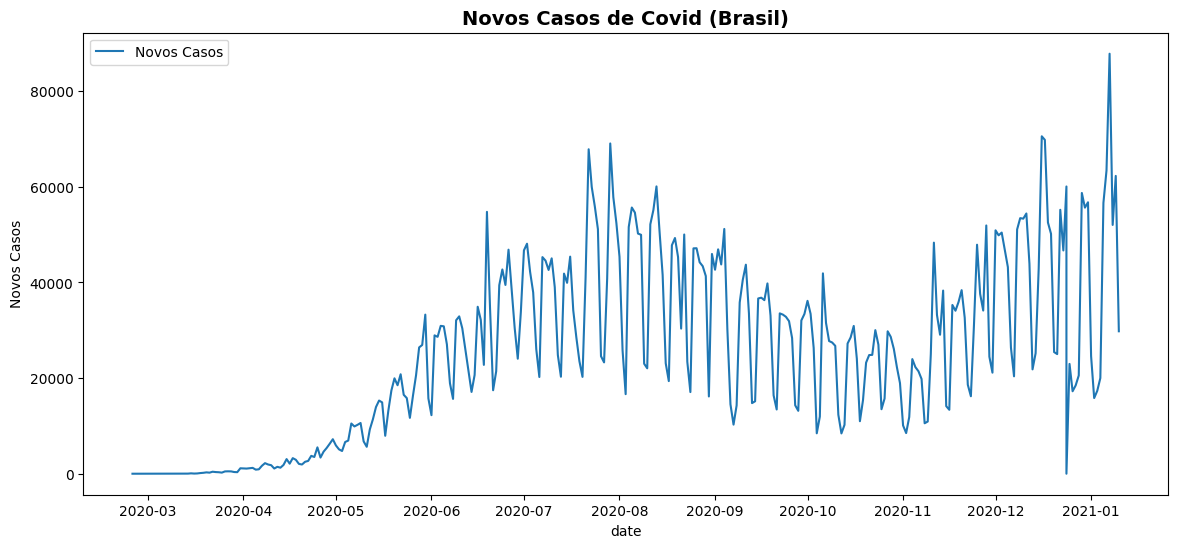

In [10]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(corona_Brasil.data, corona_Brasil.casosNovos, label='Novos Casos')

ax.set_title('Novos Casos de Covid (Brasil)', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Novos Casos")

ax.legend()

plt.show()

### (b) Ibovepa 2020

In [11]:
bovespa = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/mystocksn.csv')
bovespa.data = pd.to_datetime(bovespa.data, format='%Y-%m-%d',errors='coerce') # somente para ajustar formato da datas
bovespa.head()


,data,IBOV,VALE3,PETR4,DOLAR
0,2020-02-27,102984.0,9.92,12.08,4.4491
1,2020-02-28,104172.0,9.82,12.10,4.4848
2,2020-03-02,106625.0,10.27,12.49,4.4413
3,2020-03-03,105537.0,10.22,12.16,4.4724
4,2020-03-04,107224.0,10.56,12.33,4.5132


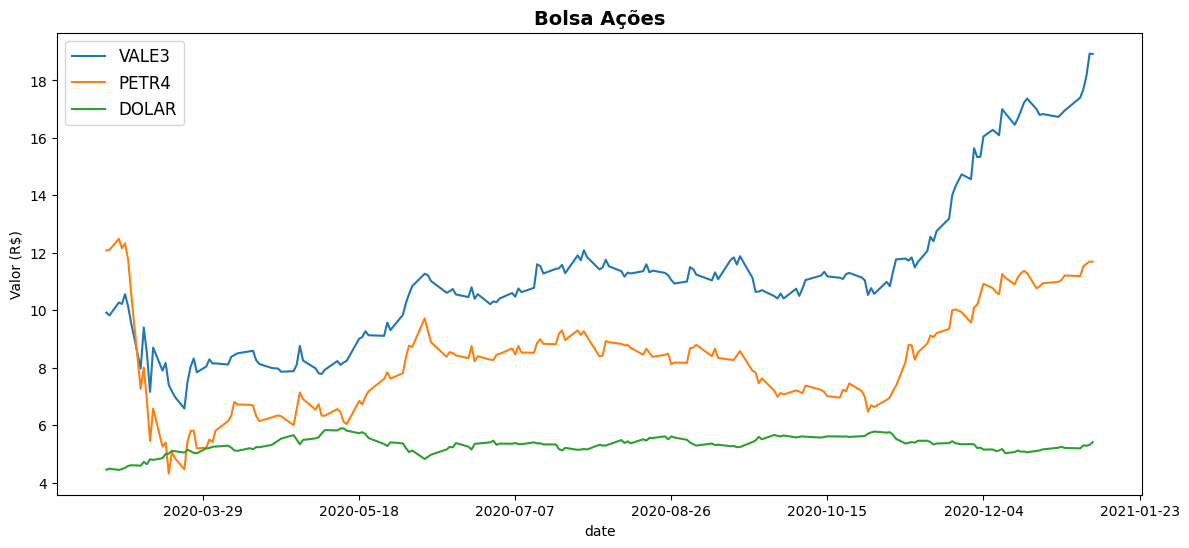

In [12]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.VALE3, label='VALE3')
ax.plot(bovespa.data, bovespa.PETR4, label='PETR4')
ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR')

ax.set_title('Bolsa Ações', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

### (c) Google Trends

In [13]:
# Este código apenas instala o pacotes para buscar dados do Google Trends e você pode querer empregá-lo para fazer suas próprias pesquisas.
!pip install pytrends
from pytrends.request import TrendReq
pytrend = TrendReq()

In [14]:
pytrend.build_payload(kw_list=['Covid','Hotel','NetFlix','Notebook'], cat=0, timeframe='2020-02-25 2021-01-10', geo='BR')
trends = pytrend.interest_over_time()

trends.head()

,Covid,Hotel,NetFlix,Notebook,isPartial
date,,,,,
2020-02-23,2,41,49,15,False
2020-03-01,2,42,36,16,False
2020-03-08,9,39,32,16,False
2020-03-15,59,22,65,19,False
2020-03-22,80,14,83,24,False


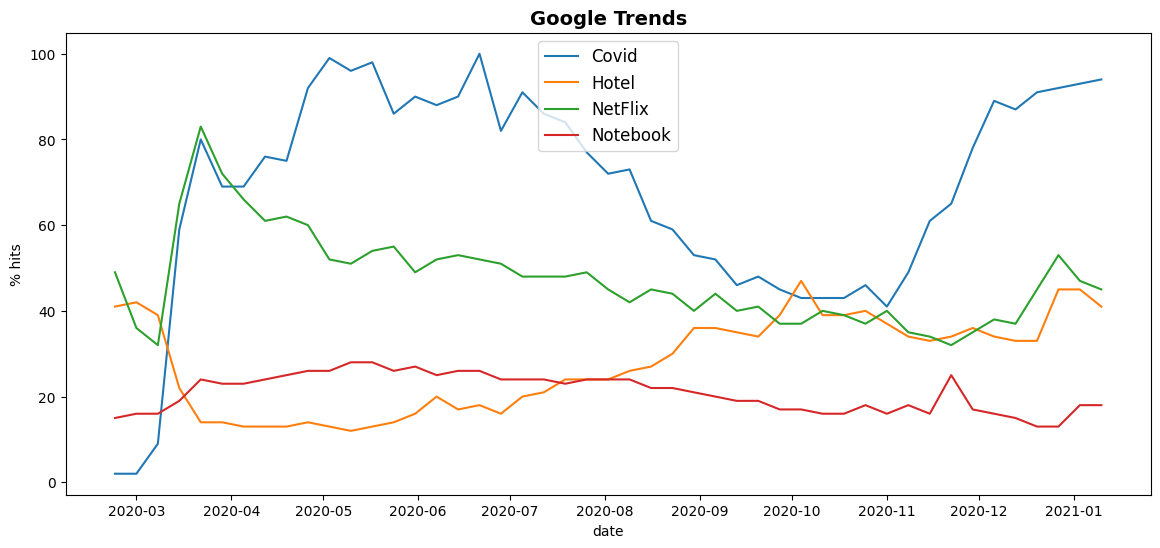

In [15]:
fig, ax = plt.subplots(figsize=(14,6))

# Gráficos
ax.plot(trends.index, trends.Covid, label='Covid')
ax.plot(trends.index, trends.Hotel, label='Hotel')
ax.plot(trends.index, trends.NetFlix, label='NetFlix')
ax.plot(trends.index, trends.Notebook, label='Notebook')

# Anotações
from datetime import datetime

ax.set_title('Google Trends', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("% hits")

ax.legend(fontsize=12)
plt.show()

E podemos então empregar todos esses dados juntos para entendermos melhor a evolução desses dados.

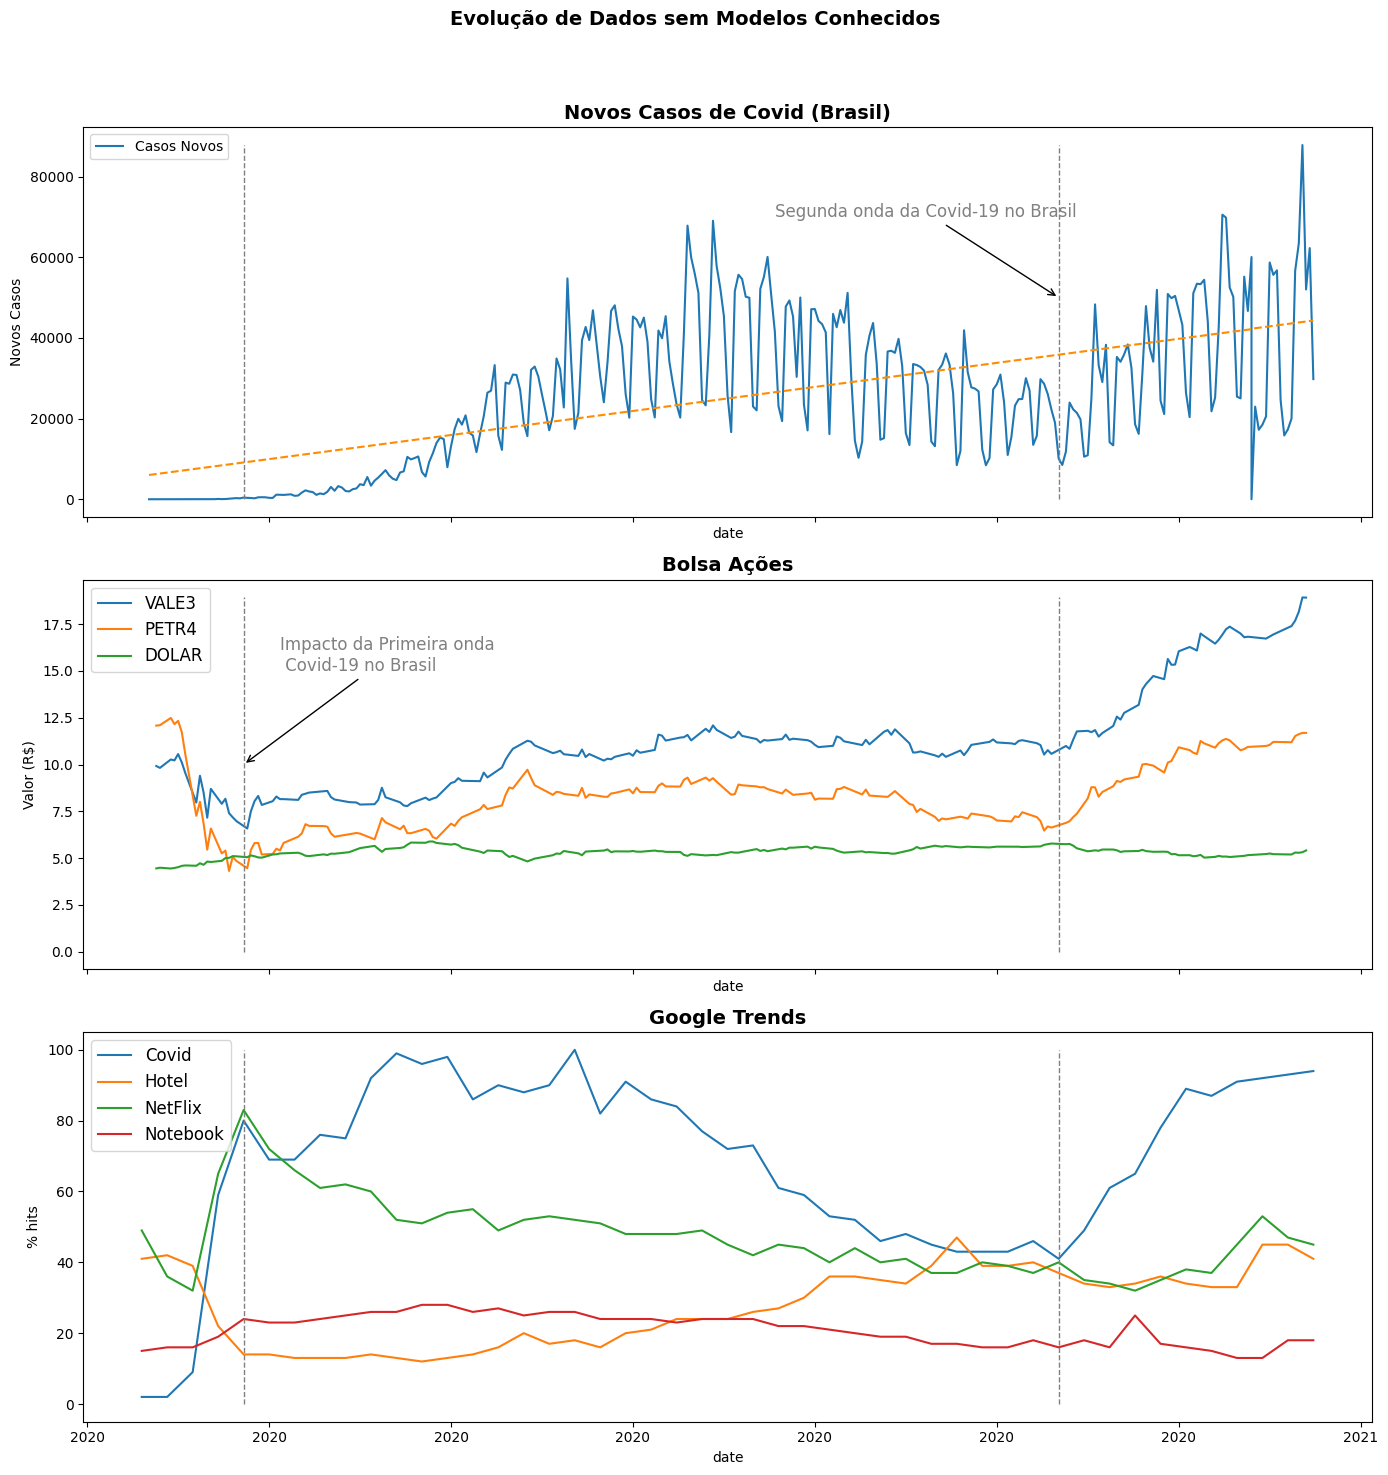

In [16]:
fig, ax = plt.subplots(3,1,figsize=(14,15), sharex=True)

fig.suptitle('Evolução de Dados sem Modelos Conhecidos', fontsize=14, weight='bold')

ax[0].plot(corona_Brasil.data, corona_Brasil.casosNovos, label='Casos Novos')

# Linhas verticais
ax[0].vlines(datetime(2020, 3, 22),0,corona_Brasil.casosNovos.max(),linewidth=1,linestyle='--',colors='grey')
ax[0].vlines(datetime(2020, 11, 1),0,corona_Brasil.casosNovos.max(),linewidth=1,linestyle='--',colors='grey')

ax[0].set_title('Novos Casos de Covid (Brasil)', fontsize=14, weight='bold')
ax[0].set_xlabel("date")
ax[0].set_ylabel("Novos Casos")

import numpy as np

x = np.arange(0,len(corona_Brasil),1)
z = np.polyfit(x, corona_Brasil.casosNovos, 1)
p = np.poly1d(z)
ax[0].plot(corona_Brasil.data,p(x),color='darkorange', linestyle='dashed')

# Annotate
ax[0].annotate('Segunda onda da Covid-19 no Brasil',
             xy=(datetime(2020, 11, 1), 50000),  # ponto do gráfico
             xytext=(datetime(2020, 8, 15), 70000),   # posição do texto
             arrowprops=dict(arrowstyle="->"),
             fontsize=12,
             color='grey')

ax[0].legend()

ax[1].plot(bovespa.data, bovespa.VALE3, label='VALE3')
ax[1].plot(bovespa.data, bovespa.PETR4, label='PETR4')
ax[1].plot(bovespa.data, bovespa.DOLAR, label='DOLAR')

# Linhas verticais
ax[1].vlines(datetime(2020, 3, 22),0,bovespa.VALE3.max(),linewidth=1,linestyle='--',colors='grey')
ax[1].vlines(datetime(2020, 11, 1),0,bovespa.VALE3.max(),linewidth=1,linestyle='--',colors='grey')

ax[1].set_title('Bolsa Ações', fontsize=14, weight='bold')
ax[1].set_xlabel("date")
ax[1].set_ylabel("Valor (R$)")

# Annotate
ax[1].annotate('Impacto da Primeira onda \n Covid-19 no Brasil',
             xy=(datetime(2020, 3, 22), 10),  # ponto do gráfico
             xytext=(datetime(2020, 4, 1),15),  # posição do texto
             arrowprops=dict(arrowstyle="->"),
             fontsize=12,
             color='grey')

import matplotlib.ticker as ticker
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(8))

ax[1].legend(fontsize=12)

ax[2].plot(trends.index, trends.Covid, label='Covid')
ax[2].plot(trends.index, trends.Hotel, label='Hotel')
ax[2].plot(trends.index, trends.NetFlix, label='NetFlix')
ax[2].plot(trends.index, trends.Notebook, label='Notebook')

# Linhas verticais
ax[2].vlines(datetime(2020, 3, 22),0,100,linewidth=1,linestyle='--',colors='grey')
ax[2].vlines(datetime(2020, 11, 1),0,100,linewidth=1,linestyle='--',colors='grey')


ax[2].set_title('Google Trends', fontsize=14, weight='bold')
ax[2].set_xlabel("date")
ax[2].set_ylabel("% hits")


ax[2].legend()

plt.legend(loc='upper left',fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

A visualização nos ajuda, por exemplo, a observar os impactos da pandemia sobre os ativos da bolsa (queda dos preços, aumento do dólar) e ou as buscas na internet (aumento de busca por serviços de *streamming*, queda de busca por hotéis).

É claro que *observar* a evolução dos dados ou suas tendências não significa *entender* a evolução e essas relações. Mas a visualização, na ausência de modelos teóricos, exibe esses comportamentos e que podemos então, analisar e entender melhor. Além de explorarmos a evolução dos dados, estamos aqui observando também relações entre os dados e, em geral, os gráficos podem explorar vários aspectos dos dados simultaneamente. Mas aqui estamos interessados na *evolução* dos dados e no capítulo de Relações você verá mais sobre isso.  

Certamente não temos a pretenção de fazer aqui uma análise completa e conclusiva dos dados acima, mas podemos ter uma ideia das relações entre buscas de termos no Google, a evolução de casos de Covid e seus impactos na Bolsa, e  observar aqui o potencial de empregarmos a visualização de dados para entender a evolução dos dados. Vamos, então, ver algumas técnicas de visualização úteis para análise de evolução dos dados.


## Adicionando linhas de Tendência

Adicionar uma linha de tendência pressupõe fazermos algum tipo de modelo de regressão sobre os dados. Fizemos isso acima no gráfico de evolução dos casos de Covid. Em geral isso envolve escolhermos um tipo de função (linear, polinomial, exponencial etc.) e, em seguida determinarmos os parâmetros dessa função a partir, por exemplo, de um método de otimização como o de mínimos quadrados.

Essa pode ser uma tarefa bastante complexa e o `Matplotlib` não tem um função direta para produzir essas linhas de tendência. Mas podemos fazer uso de outros pacotes `Python` para isso e, no final, a solução é bastante simples e flexível pois permite empregar muitos outros métodos de regressão, incluindo até modelos de aprendizado de máquina.

Vamos começar com um conjunto de dados simples que já conhecemos, o quarteto de Anscombe.

In [17]:
import seaborn as sns

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


### Aproximando por um polinômio `np.polyfit()`

A função `np.polyfit()` do pacote `NumPy` pode ser empregada para se obter os coeficientes de um polinômino de grau qualquer que melhor aproxima um conjunto de pontos. Se empregada com o grau 1 a aproximação será um modelo de **regressão linear** encontrando a melhor aproximação dos dados por uma reta.

O uso é bastante direto:

```
  z = np.polyfit(ds.x, ds.y, 1)
  p = np.poly1d(z)
```

A função `np.polyfit(x,y,<grau>)` é um otimizador e faz o cálculo dos coeficientes do polinômio $p( )$ que melhor aproxima os dados $y = p(x)$ com o grau indicado. A função `p = np.poly1d(z)` retorna o polinômio em forma de uma função que pode ser então aplicada a qualquer conjunto de dados. Um comando `x = np.arange()` pode ser empregado para gerar um intervalo de valores em que desejamos aplicar o polinômio `p`, para exibir uma linha contínua `plt.plot(x,p(x))`.


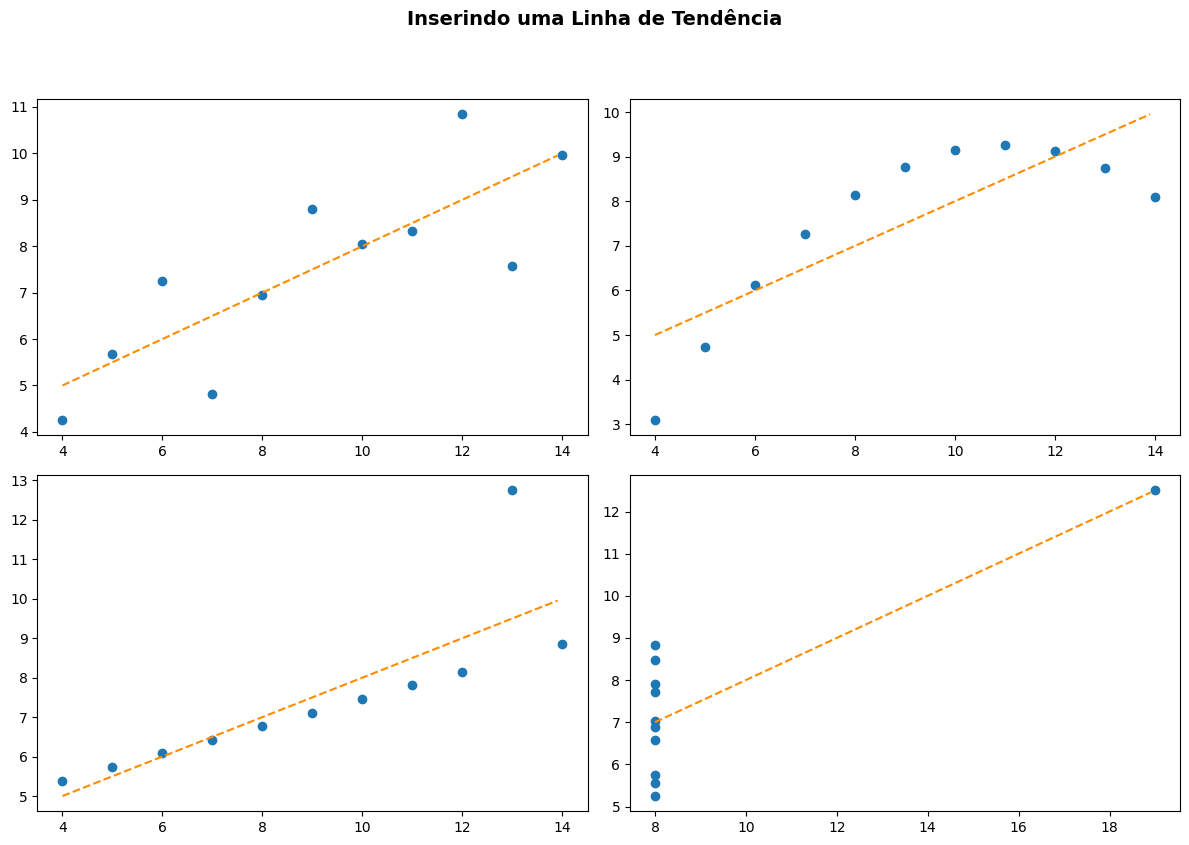

In [20]:
fig, ax = plt.subplots(2,2,figsize=(12,8))

fig.suptitle('Inserindo uma Linha de Tendência', fontsize=14, weight='bold', y=1.05)

i = 0
for ds_type in df.dataset.unique():
  ds = df[df.dataset == ds_type]

  # z = np.polyfit(ds.x, ds.y, 1)
  # p = np.poly1d(z)

  p = np.polynomial.Polynomial.fit(ds.x, ds.y, 1) # change for NumPy 1.26 (Abril, 2024)

  ax[i//2,i%2].scatter(ds.x,ds.y)

  x = np.arange(ds.x.min(), ds.x.max(), 0.1)
  ax[i//2,i%2].plot(x,p(x),color='darkorange', linestyle='dashed')

  i += 1

plt.tight_layout()
plt.show()

Podemos empregar o mesmo método para a aproximação com polinômios de grau maior.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


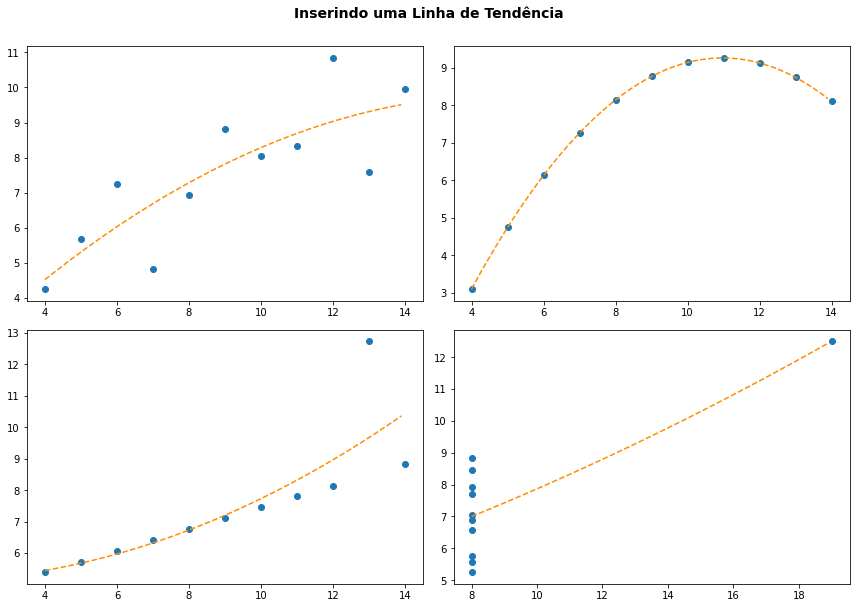

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,8))

fig.suptitle('Inserindo uma Linha de Tendência', fontsize=14, weight='bold', y=1.05)

i = 0
for ds_type in df.dataset.unique():
  ds = df[df.dataset == ds_type]

  z = np.polyfit(ds.x, ds.y, 2)
  p = np.poly1d(z)

  ax[i//2,i%2].scatter(ds.x,ds.y)

  x = np.arange(ds.x.min(), ds.x.max(), 0.1)
  ax[i//2,i%2].plot(x,p(x),color='darkorange', linestyle='dashed')

  i += 1

plt.tight_layout()
plt.show()

A vantagem desse método está em você poder empregar quaisquer outros otimizadores e fazer a aproximação com funções arbitrárias de sua escolha, não ficando assim restrito aos modelos linear ou polinomial. Fazemos isso no exemplo a seguir empregando o pacote `SciPy` e empregando uma função arbitrária.

O pacote `SciPy` é um eco-sistema `Python` para computação científica que inclui, dentre outros o `NumPy` e o `Matplotlib`. Ele fornece um método `curve_fit()` para obter os coeficientes que melhor aproximam um conjunto de pontos a uma função arbitrária de sua escolha. Os parâmetros obtidos da função são retornados em `*popt` e podem ser empregados para aplicar a função a um intervalo de valores que você deseja empregar do mesmo modo que no exemplo anterior.

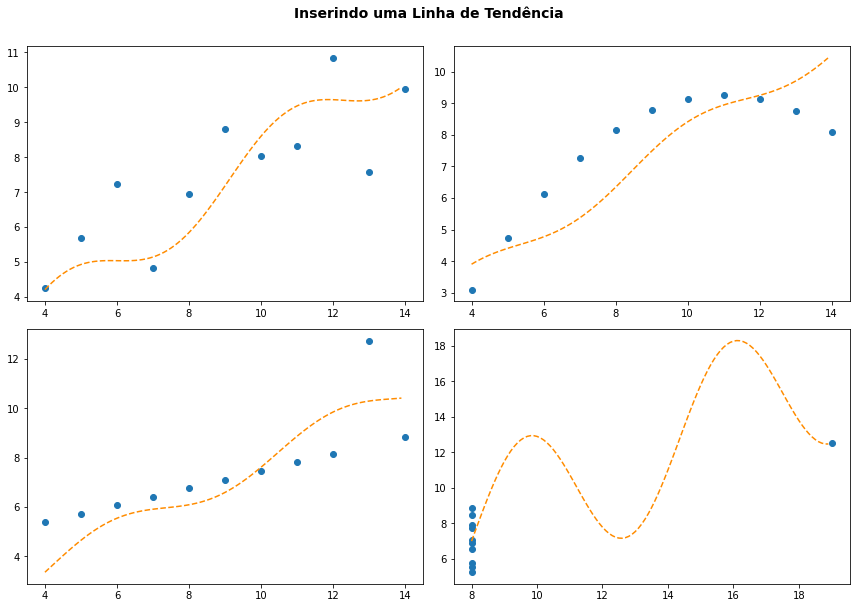

In [ ]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a*np.sin(x) + b*np.cos(x) + x**c

fig, ax = plt.subplots(2,2,figsize=(12,8))

fig.suptitle('Inserindo uma Linha de Tendência', fontsize=14, weight='bold', y=1.05)

i = 0
for ds_type in df.dataset.unique():
  ds = df[df.dataset == ds_type]

  popt, pcov = curve_fit(func, ds.x, ds.y)

  ax[i//2,i%2].scatter(ds.x,ds.y)

  x = np.arange(ds.x.min(), ds.x.max(), 0.1)

  ax[i//2,i%2].plot(x,func(x,*popt),color='darkorange', linestyle='dashed')
  i += 1

plt.tight_layout()
plt.show()

Mas se para você for suficiente empregar um modelo linear e apenas buscar a visualização dessa tendência nos dados, você pode também querer empregar a função do pacote `Seaborn`, `regplot()`. Essa função exibe a linha de tendência linear dos dados adicionando ainda o intervalo de confiança com o modelo obtido.

O uso é também bastante simples,

```
sns.regplot(x='x', y='y', data=df)
```

e o comando acima irá exibir os pontos `'x'` e `'y'` de um `DataFrame` `df` com a linha de regressão linear e o intervalo de confiança correspondente.


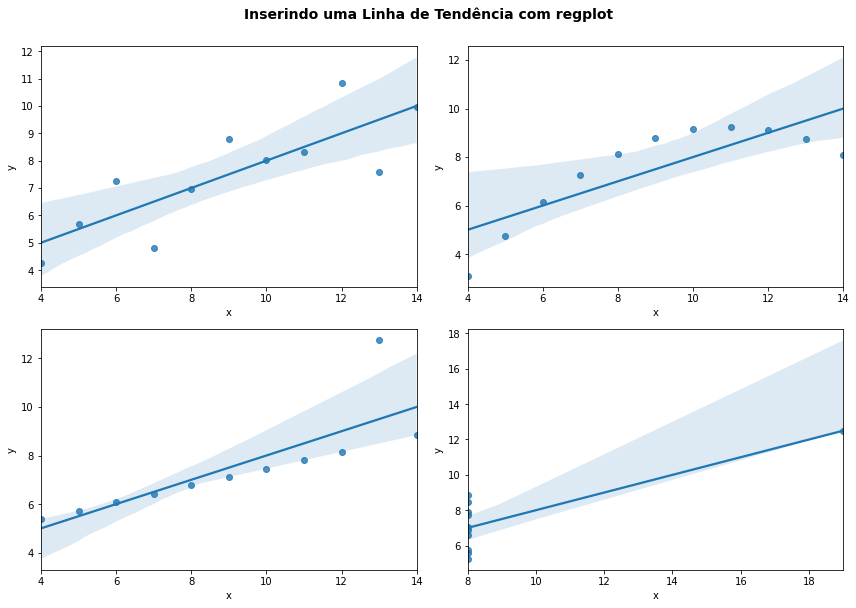

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,8))

fig.suptitle('Inserindo uma Linha de Tendência com regplot', fontsize=14, weight='bold', y=1.05)

i = 0
for ds_type in df.dataset.unique():
  ds = df[df.dataset == ds_type]

  sns.regplot(x='x', y='y', data=ds, ax=ax[i//2,i%2])
  i += 1

plt.tight_layout()
plt.show()

Você pode pesquisar mais sobre isso na documentação do `Seaborn`. O gráfico `sns.lmplot()` ainda combina as funções `regplot()` e `FacetGrid`, uma classe que combina gráficos de diferentes subconjuntos de dados. Esse é um recurso específico do `Seaborn` e que não iremos explorar aqui, mas você pode experimentar o comando:

```
import seaborn as sns
sns.lmplot(x='x', y='y', col='dataset', data=df, scatter_kws={"s": 50, "alpha": 1})
plt.show()
```

Para exibir as linhas de tendência para os diferentes subconjuntos de dados tendo como filtro os valores do atributo `dataset`.





### Linhas de Tendência no Modelo de uma Turbina Eólica

Vamos agora aplicar essas linhas de tendência ao nosso conjunto de dados de uma Turbina Eólica. Reduzindo os dados ao intervalo de valores antes do patamar de saturação, podemos produzir as linhas de tendência linear e com um polinômio de grau 3.


In [ ]:
data_T_AA = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/T1_reshape.csv')
data_T_AA_mean = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/T1_reshape_mean.csv')

data_T_AA.head()


,WindSpeed(m/s),ActivePower(kW),Theoretical_Power_Curve (KWh),Loss_Value(kW),Loss(%),count,direction
0,3.5,43.46,70.58,27.12,38.02,29,N
1,4.0,88.01,127.57,39.56,31.60,101,N
2,4.5,160.51,217.01,56.50,26.42,102,N
3,5.0,274.71,335.67,60.96,18.44,99,N
4,5.5,388.60,465.84,77.24,16.79,119,N


In [ ]:
data_T_AA_mean.head()

,WindSpeed(m/s),ActivePower(kW),Theoretical_Power_Curve (KWh),Loss_Value(kW),Loss(%),count
0,3.5,52.191667,68.939167,16.745833,23.584167,56.250000
1,4.0,97.756667,127.686667,29.929167,23.646667,144.666667
2,4.5,183.601667,221.930000,38.327500,17.488333,149.500000
3,5.0,286.590833,336.426667,49.835000,14.937500,143.750000
4,5.5,400.392500,470.090833,69.699167,14.838333,167.666667


In [ ]:
data_T_AA = data_T_AA[ data_T_AA["WindSpeed(m/s)"] < 12.5 ]
data_T_AA_mean = data_T_AA_mean[ data_T_AA_mean["WindSpeed(m/s)"] < 12.5 ]

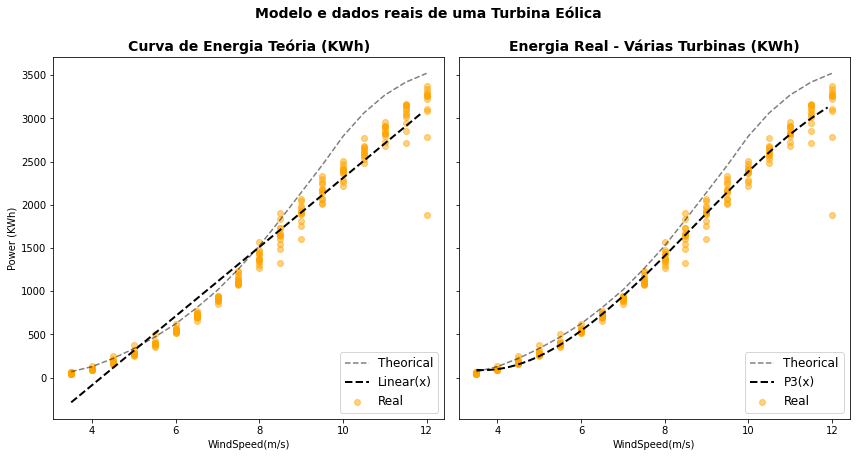

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,6),sharey=True)

fig.suptitle('Modelo e dados reais de uma Turbina Eólica', fontsize=14, weight='bold', y=1.05)

ax[0].plot(data_T_AA_mean["WindSpeed(m/s)"],data_T_AA_mean["Theoretical_Power_Curve (KWh)"], '--k', label='Theorical', alpha=0.5)
ax[0].scatter(data_T_AA["WindSpeed(m/s)"],data_T_AA["ActivePower(kW)"], label='Real', marker='o', color='orange', alpha=0.5)

ax[1].plot(data_T_AA_mean["WindSpeed(m/s)"],data_T_AA_mean["Theoretical_Power_Curve (KWh)"], '--k', label='Theorical', alpha=0.5)
ax[1].scatter(data_T_AA["WindSpeed(m/s)"],data_T_AA["ActivePower(kW)"], label='Real', marker='o', color='orange', alpha=0.5)

x = np.arange(data_T_AA["WindSpeed(m/s)"].min(),data_T_AA["WindSpeed(m/s)"].max(), 0.1)

z = np.polyfit(data_T_AA["WindSpeed(m/s)"],data_T_AA["ActivePower(kW)"], 1)
p = np.poly1d(z)
ax[0].plot(x,p(x), linestyle='dashed', label='Linear(x)',linewidth=2, color='k')

z = np.polyfit(data_T_AA["WindSpeed(m/s)"],data_T_AA["ActivePower(kW)"], 3)
p = np.poly1d(z)
ax[1].plot(x,p(x), linestyle='dashed', label='P3(x)' ,linewidth=2, color='k')

ax[0].set_title("Curva de Energia Teória (KWh)", fontsize=14, weight='bold')
ax[1].set_title("Energia Real - Várias Turbinas (KWh)", fontsize=14, weight='bold')
ax[0].set_ylabel("Power (KWh)")

ax[0].set_xlabel("WindSpeed(m/s)")
ax[1].set_xlabel("WindSpeed(m/s)")

ax[0].legend(loc='lower right',fontsize=12)
ax[1].legend(loc='lower right',fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.tight_layout()
plt.show()

Como você pode ver o ajuste linear oferece pouca aderência aos dados coletados. Já modelo polinomial de grau 3,  no intervalo de valores empregado, parece se ajustar até melhor que o próprio modelo teórico do fabricante!

### Tendências e Séries Temporais

Na maior parte dos casos não vamos encontrar um modelo tão próximo como no exemplo anterior da nossa Turbina Eólica, mas estaremos interessados apenas em buscar definir melhor uma tendência de crescimento ou não dos valores. Nesses casos, parece suficiente adotarmos uma linha de tendência linear. Vamos ilustrar isso empregando dados de cotações de índice da bolsa e entender um problema muito comum na busca de tendências de séries temporais.

$\rightarrow$ *Aqui você vai encontrar um problema muito comum ao buscarmos tendências em dados temporais. Sua variável independente (a linha do tempo) não pode ser aplicada diretamente a uma regressão linear (ou outra qualquer) pois seus dados não são numéricos. Para fazer isso teremos de empregar um artifício e transformar a linha do tempo em um atributo numérico.*

Isso pode ser feito atribuindo-se para cada data do conjunto de dados um valor inteiro diferente a partir de 0. Se cada linha do conjunto de dados corresponde a uma data, esse valor pode ser o próprio índice do seu conjunto de dados (para um `DataFrame`, `df.index`).






In [ ]:
bovespa = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/mystocksn.csv')
bovespa.data = pd.to_datetime(bovespa.data, format='%Y-%m-%d',errors='coerce') # somente para ajustar formato da datas
bovespa.head()


,data,IBOV,VALE3,PETR4,DOLAR
0,2020-02-27,102984.0,9.92,12.08,4.4491
1,2020-02-28,104172.0,9.82,12.10,4.4848
2,2020-03-02,106625.0,10.27,12.49,4.4413
3,2020-03-03,105537.0,10.22,12.16,4.4724
4,2020-03-04,107224.0,10.56,12.33,4.5132


In [ ]:
bovespa.index

RangeIndex(start=0, stop=185, step=1)

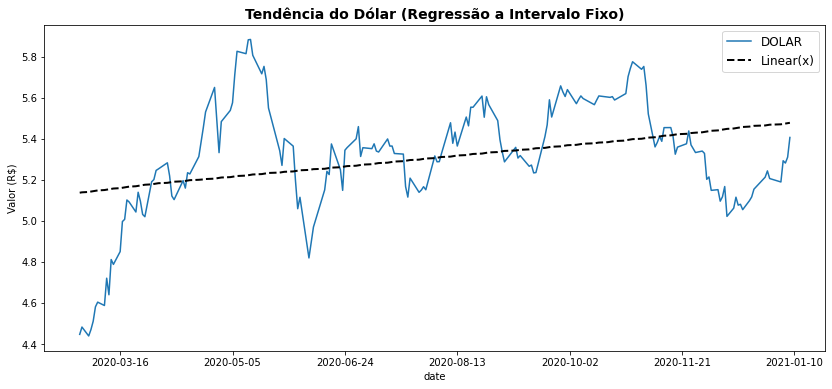

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR')

ax.set_title('Tendência do Dólar (Regressão a Intervalo Fixo)', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")

z = np.polyfit(bovespa.index,bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')

# OU
# x = np.arange(0,len(bovespa),1)
# z = np.polyfit(x,bovespa.DOLAR, 1)
# p = np.poly1d(z)
# ax.plot(bovespa.data,p(x), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

O procedimento acima é útil para em muitos casos que envolvem séries temporais. Acima empregamos o índice dos dados (186 valores de $[0,185]$ para cada data) para linha de tempo da regressão mas, na ausência de um índice, podemos criar um valor diferente para cada data empregando, por exemplo:

```
x = np.arange(0,len(bovespa),1)
```

isso encontra-se comentado no código acima como uma forma opcional.

Há entretanto uma série de detalhes nisso. Por exemplo, você pode ter intervalos de datas diferentes e, neste caso, pode ser necessário associar a cada data a distãncia com relação a menor data no seu conjunto de dados (não empregando portanto valores com um incremento fixo como fizemos).

No nosso exemplo, como os dados da bolsa referem-se a dias úteis há intervalos de datas maiores nos finais de semana e feriados e, embora os resultados sejam praticamente os mesmos aqui, a rigor precisamos empregar intervalos de datas diferentes e para muitos casos isso pode ser realmente necessário. Fazemos esse procedimento abaixo adicionando um novo atributo com quantidade de dias a partir da data inicial. A função `dt.days` permite transformar esses valores para o cálculo da regressão.  

In [ ]:
bovespa['dias'] = bovespa['data'] - bovespa['data'].min()

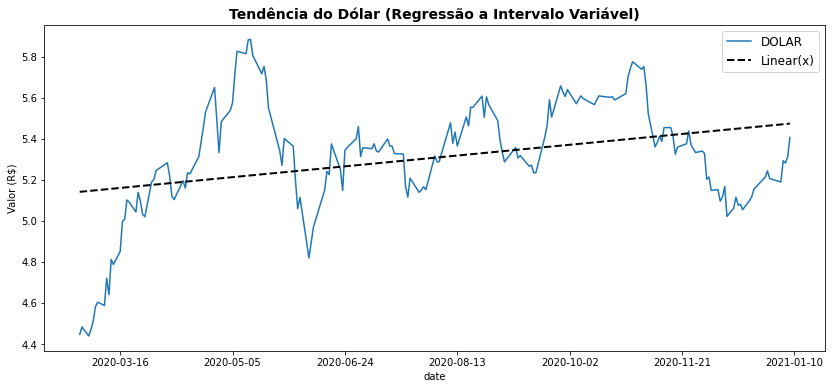

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR')

ax.set_title('Tendência do Dólar (Regressão a Intervalo Variável)', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")

z = np.polyfit(bovespa.dias.dt.days,bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

Aqui o resultado é praticamente o mesmo, mas para os casos onde os intervalos de data tenham diferenças maiores isso poderá ser relevante.

### Linha de Tendência com Média dos Dados

Uma outra forma de entendermos as linhas de tendência dos dados é empregarmos a média dos vários valores e ligar esses pontos a uma linha de tendência. Aqui não buscamos aproximar nenhum modelo, como um modelo linear ou polinomial, mas simplesmente exibir uma média de tendência dos dados.



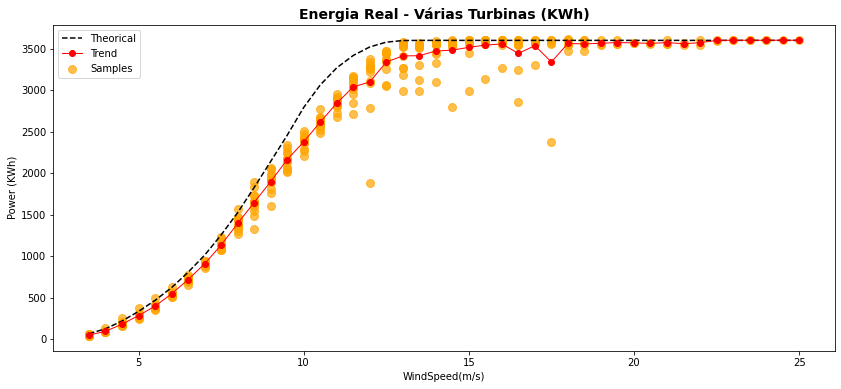

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

data_T_AA = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/T1_reshape.csv')
data_T_AA_mean = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/T1_reshape_mean.csv')

plt.plot(data_T_AA_mean["WindSpeed(m/s)"],data_T_AA_mean["Theoretical_Power_Curve (KWh)"],'--k',label='Theorical')
plt.plot(data_T_AA_mean["WindSpeed(m/s)"],data_T_AA_mean["ActivePower(kW)"], marker='o', color='r', linewidth=1, label='Trend')
plt.scatter(data_T_AA["WindSpeed(m/s)"],data_T_AA["ActivePower(kW)"], marker='o', color='orange',  alpha=0.7, s=64, label='Samples')

plt.title("Energia Real - Várias Turbinas (KWh)", fontsize=14, weight='bold')
plt.ylabel("Power (KWh)")
plt.xlabel("WindSpeed(m/s)")
plt.legend()

plt.show()

Essa linha média ainda pode ser incrementada com uma margem de erro, por exemplo o desvio padrão, permitindo acompanhar a dispersão dos dados ao longo da linha média. Para isso, no lugar do `plot` você poderá empregar o comando `plt.errorbar`.

Vamos empregar isso em nosso conjunto de dados da bolsa de valores. Como nossos dados apresentam apenas uma única cotação diária, iremos agregar a cotações e exibir as cotações mensais ao longo dos doze meses da base.



In [ ]:
bovespa['mes'] = bovespa['data'].dt.month
bovespa['mes'] = bovespa['mes'] - 1
bovespa.at[ bovespa['mes'] == 0 , 'mes' ] = 12

In [ ]:
bovespa.head()

,data,IBOV,VALE3,PETR4,DOLAR,dias,mes
0,2020-02-27,102984.0,9.92,12.08,4.4491,0 days,1
1,2020-02-28,104172.0,9.82,12.10,4.4848,1 days,1
2,2020-03-02,106625.0,10.27,12.49,4.4413,4 days,2
3,2020-03-03,105537.0,10.22,12.16,4.4724,5 days,2
4,2020-03-04,107224.0,10.56,12.33,4.5132,6 days,2


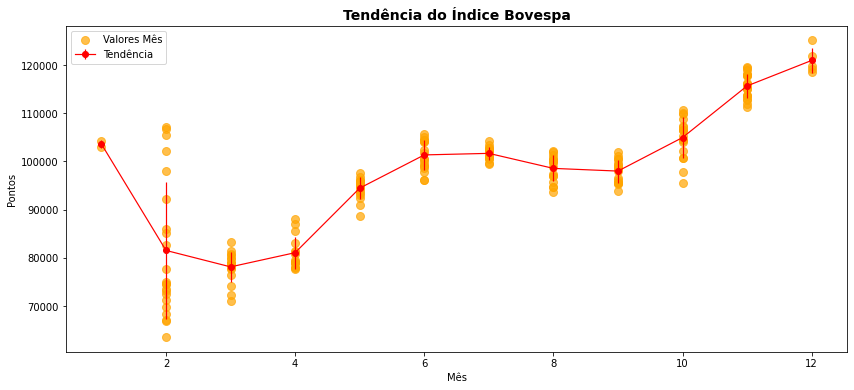

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

yerr = []
ymean = []
for mes in bovespa.mes.unique():
  yerr.append(bovespa[bovespa.mes == mes]['IBOV'].std())
  ymean.append(bovespa[bovespa.mes == mes]['IBOV'].mean())
yerr = np.array(yerr)
ymean = np.array(ymean)

plt.errorbar(bovespa.mes.unique(), ymean, yerr=yerr, label='Tendência', marker='o', color='r', linewidth=1.2)
plt.scatter(bovespa.mes, bovespa.IBOV, label='Valores Mês', marker='o', color='orange', alpha=0.7, s=64)

plt.title("Tendência do Índice Bovespa", fontsize=14, weight='bold')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.show()

O mesmo procedimento poderia ser feito se tivéssemos cotações diárias do índice, e se já você acompanhou gráficos empregados na análise técnica de ações da bolsa na mídia ou em aplicativos de investimento, deve notar a semelhança dos gráficos. No caso de ações da bolsa, entretanto, é mais comum essa tendência ser acompanhada por gráficos de caixa, ou `boxplot` como abaixo.

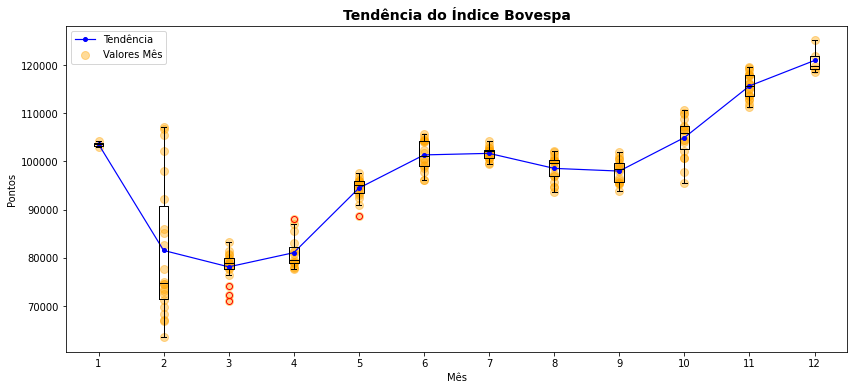

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

plt.plot(bovespa.mes.unique(), ymean, label='Tendência', marker='o', color='b', linewidth=1.2, markersize=4)
plt.scatter(bovespa.mes, bovespa.IBOV, label='Valores Mês', marker='o', color='orange', alpha=0.4, s=64)
for mes in bovespa.mes.unique():
  plt.boxplot(bovespa[bovespa.mes == mes].IBOV, positions=[mes], widths=0.15, flierprops=dict(color='r',markeredgecolor='r'),medianprops=dict(color='k'))

plt.title("Tendência do Índice Bovespa", fontsize=14, weight='bold')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.show()

O gráficos de caixa são uma forma sintética de exibir distribuições dos dados e esse, e outros gráficos de distribuição, é o que veremos a seguir no capítulo de Distribuição.



## Trabalhando com Escalas Diferentes

Se você empregar agora diretamente o gráfico anterior para analisar a tendência não só do dólar mas também do índice Bovespa o resultado não irá ser dos melhores.

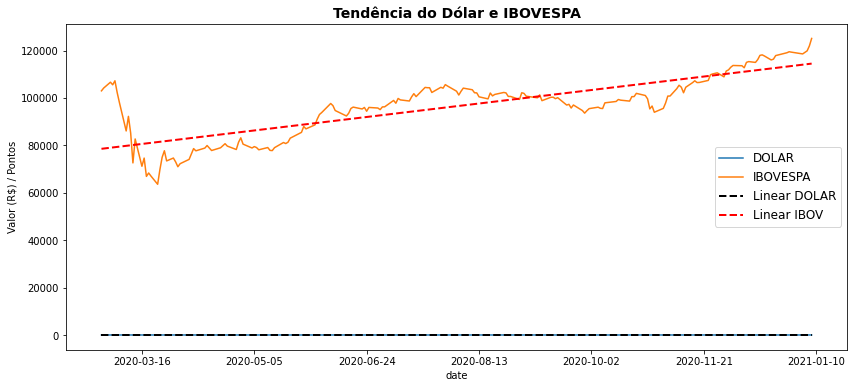

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR')
ax.plot(bovespa.data, bovespa.IBOV, label='IBOVESPA')

ax.set_title('Tendência do Dólar e IBOVESPA', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$) / Pontos")

z = np.polyfit(bovespa.dias.dt.days,bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear DOLAR' ,linewidth=2, color='k')

z = np.polyfit(bovespa.dias.dt.days,bovespa.IBOV, 1)
p = np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear IBOV' ,linewidth=2, color='r')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

Se você observar com atenção o mal resultado dessa visualização é por quê os dados estão em escalas de valores muito diferentes e você não consegue, no mesmo gráfico, observar claramente as variáveis do dólar que encontram-se em um intervalo $4 \pm 1$ de valores e os valores de índice Bovespa, no intervalo $100000 \pm 10000$.

O comando `ax.twinx()` no modo `Artist Layer` pode ser uma alternativa. Ele permite você apresentar duas escalas diferentes no mesmo gráfico e podemos assim comparar a tendência das duas séries de dados simultaneamente.

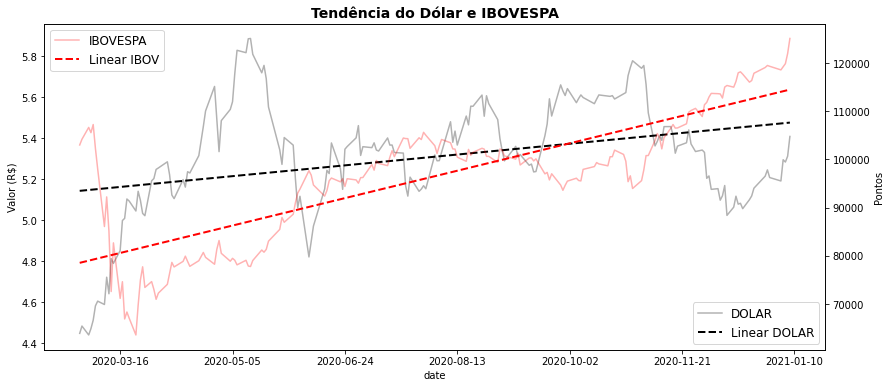

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR', color='k', alpha=0.3)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(bovespa.data, bovespa.IBOV, label='IBOVESPA', color='r', alpha=0.3)

ax.set_title('Tendência do Dólar e IBOVESPA', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")
ax2.set_ylabel("Pontos")

z = np.polyfit(bovespa.dias.dt.days,bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear DOLAR' ,linewidth=2, color='k')

z = np.polyfit(bovespa.dias.dt.days,bovespa.IBOV, 1)
p = np.poly1d(z)
ax2.plot(bovespa.data,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear IBOV' ,linewidth=2, color='r')

ax.legend(loc='lower right',fontsize=12)
ax2.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

Esse procedimento, entretanto, só é útil quando temos até duas escalas diferentes de dados. Para mais de duas escalas a forma que podemos empregar é a normalização dos dados.

$\rightarrow$ *Cuidado ao empregar normalizações dos dados! Ao exibir os dados normalizados você não estará mais observando os valores reais dos dados, mas  seus movimentos relativos.*

Existem várias formas de normalização e poderíamos aplicar simplesmente uma normalização *min/max*, dividindo cada valor pelo seu valor máximo, e levar cada valor para o intervalo $[0,1]$. Mas vamos adotar um procedimento muito usado, e igualmente simples, aplicando uma normalização conhecida como *standard scaler* que normaliza os valores levando o conjutno de dados a uma média 0 e desvio padrão 1.

$$ z = \frac{x - \bar{x}}{\sigma(x)}$$

O resultado encontra-se abaixo.

In [ ]:
bovespa_norm = ( bovespa.drop(columns=['data','dias']) - bovespa.drop(columns=['data','dias']).mean() ) / bovespa.drop(columns=['data','dias']).std()
bovespa_norm = pd.concat([bovespa[['data','dias']], bovespa_norm],axis=1)
bovespa_norm.head()


,data,dias,IBOV,VALE3,PETR4,DOLAR,mes
0,2020-02-27,0 days,0.488931,-0.464186,2.132811,-3.018888,-1.797812
1,2020-02-28,1 days,0.578304,-0.500953,2.144005,-2.893685,-1.797812
2,2020-03-02,4 days,0.762844,-0.335505,2.362293,-3.046244,-1.475842
3,2020-03-03,5 days,0.680993,-0.353888,2.177588,-2.937172,-1.475842
4,2020-03-04,6 days,0.807907,-0.228884,2.272739,-2.794083,-1.475842


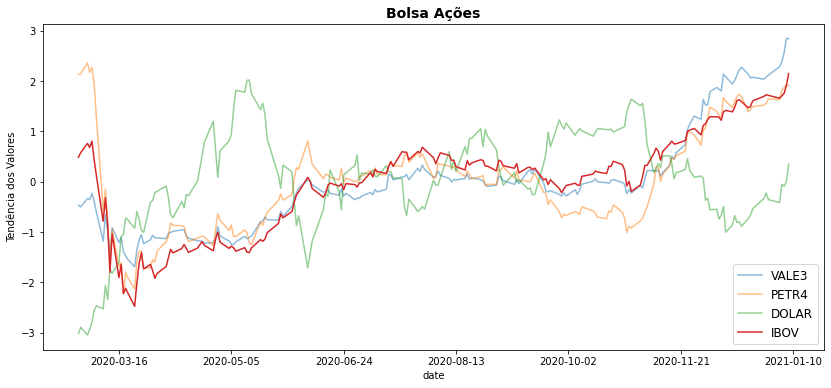

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa_norm.data, bovespa_norm.VALE3, label='VALE3', alpha=0.5)
ax.plot(bovespa_norm.data, bovespa_norm.PETR4, label='PETR4', alpha=0.5)
ax.plot(bovespa_norm.data, bovespa_norm.DOLAR, label='DOLAR', alpha=0.5)
ax.plot(bovespa_norm.data, bovespa_norm.IBOV, label='IBOV')

ax.set_title('Bolsa Ações', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Tendência dos Valores")

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

Não vamos tirar conclusões sobre esses dados aqui. Nosso interesse aqui é apenas nas técnicas de visualização e de análise empregados. Mas você pode, por exemplo, observar que o índice da bolsa segue de forma bastante próxima os movimentos das ações da VALE3 e PETR4, e identificar a presença de vales do índice quando de fortes aumentos do dólar. Mas devemos deixar uma análise melhor desses movimentos para os economistas e analistas de mercado.  

## Um Cuidado no Uso do `plt.plot()`

Esse é um erro tão comum no uso do `plt.plot()` que vale a pena voltarmos nele aqui antes de prosseguirmos para o próximo capítulo.


$\rightarrow$ *Evite produzir gráficos de linha com o `Matplotlib` quando há mais de ponto para a mesma coordenada*.

Se você já entendeu isso pode saltar esta seção, mas vamos entender melhor o que isso significa.  



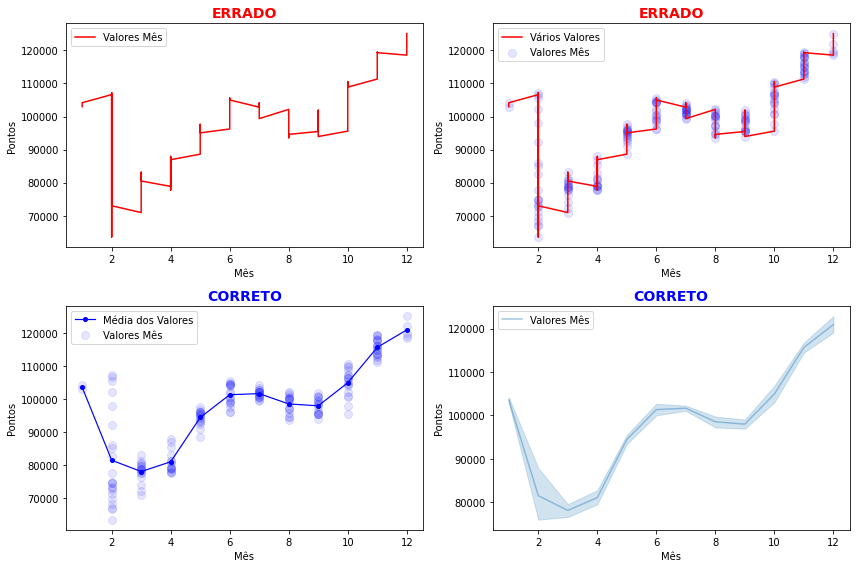

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,8),sharex=True,sharey=True)

plt.subplot(2,2,1)

plt.plot(bovespa.mes, bovespa.IBOV, label='Valores Mês', color='r')

plt.title("ERRADO", fontsize=14, weight='bold', color='r')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.subplot(2,2,2)

plt.scatter(bovespa.mes, bovespa.IBOV, label='Valores Mês', marker='o', color='b', alpha=0.1, s=64)
plt.plot(bovespa.mes, bovespa.IBOV, label='Vários Valores', color='r')

plt.title("ERRADO", fontsize=14, weight='bold', color='r')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.subplot(2,2,3)

plt.plot(bovespa.mes.unique(), ymean, label='Média dos Valores', marker='o', color='b', linewidth=1.2, markersize=4)
plt.scatter(bovespa.mes, bovespa.IBOV, label='Valores Mês', marker='o', color='b', alpha=0.1, s=64)

plt.title("CORRETO", fontsize=14, weight='bold', color='b')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.subplot(2,2,4)

sns.lineplot(x=bovespa.mes, y=bovespa.IBOV, label='Valores Mês', alpha=0.4)

plt.title("CORRETO", fontsize=14, weight='bold', color='b')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.tight_layout()
plt.show()

O gráfico `plt.plot` do `Matplotlib` conecta cada ponto de dados por uma linha. Portanto, havendo mais de um ponto de dados para uma mesma coordenada o resultado é o que você encontra no primeiro gráfico da figura acima o quê, certamente, não é o que você desejaria para representar os dados. O erro fica claramente exibido no gráfico seguinte que mostra os vários pontos de dados de uma mesma coordenada ligados.

Nesses casos é mais adequado empregar um *scatter plot* e, se quiser, adicionar uma linha média como fizemos nos exemplos anteriores ou aqui no terceiro gráfico. O `sns.lineplot` do pacote `Seaborn` também pode ser uma opção já que tem um comportamento diferente do `plt.plot`. Ele já exibe por padrão a linha média dos dados e adiciona um intervalo de confiança em torno desses valores. Quaisquer dessas opções são corretas e podem ser então empregadas.
